In [ ]:
'''
In this notebook we are going to predict the price of house given their square footage and number of bedrooms and bathrooms using linear regression models

'''

'\nIn this notebook we are going to predict the price of house given their square footage and number of bedrooms and bathrooms using linear regression models\n\n'

In [ ]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
#load the train dataset
pd.set_option('display.max_columns', None)
train = pd.read_csv('/content/train.csv')

#check the dataset
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Cleaning & Validation

In [ ]:
'''
We will check the number of columns we have in our dataset to se the relevant columns we have to work with.
We will begin with data cleaning and validation. Then we will check for outliers and then check the relationship between these relevant columns.
'''

'\nWe will check the number of columns we have in our dataset to se the relevant columns we have to work with.\nWe will begin with data cleaning and validation. Then we will check for outliers and then check the relationship between these relevant columns.\n'

In [ ]:
#check the columns
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
#check the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
'''
From the above data we see we have a lot of features and some missing values as well.
Per our objective we need to find the sale price of the house given the number of bathroom and bedrooms as well as their.
Beforw we continue we would like to see the relationship between all these features.
'''

'\nFrom the above data we see we have a lot of features and some missing values as well.\nPer our objective we need to find the sale price of the house given the number of bathroom and bedrooms as well as their.\nBeforw we continue we would like to see the relationship between all these features.\n'

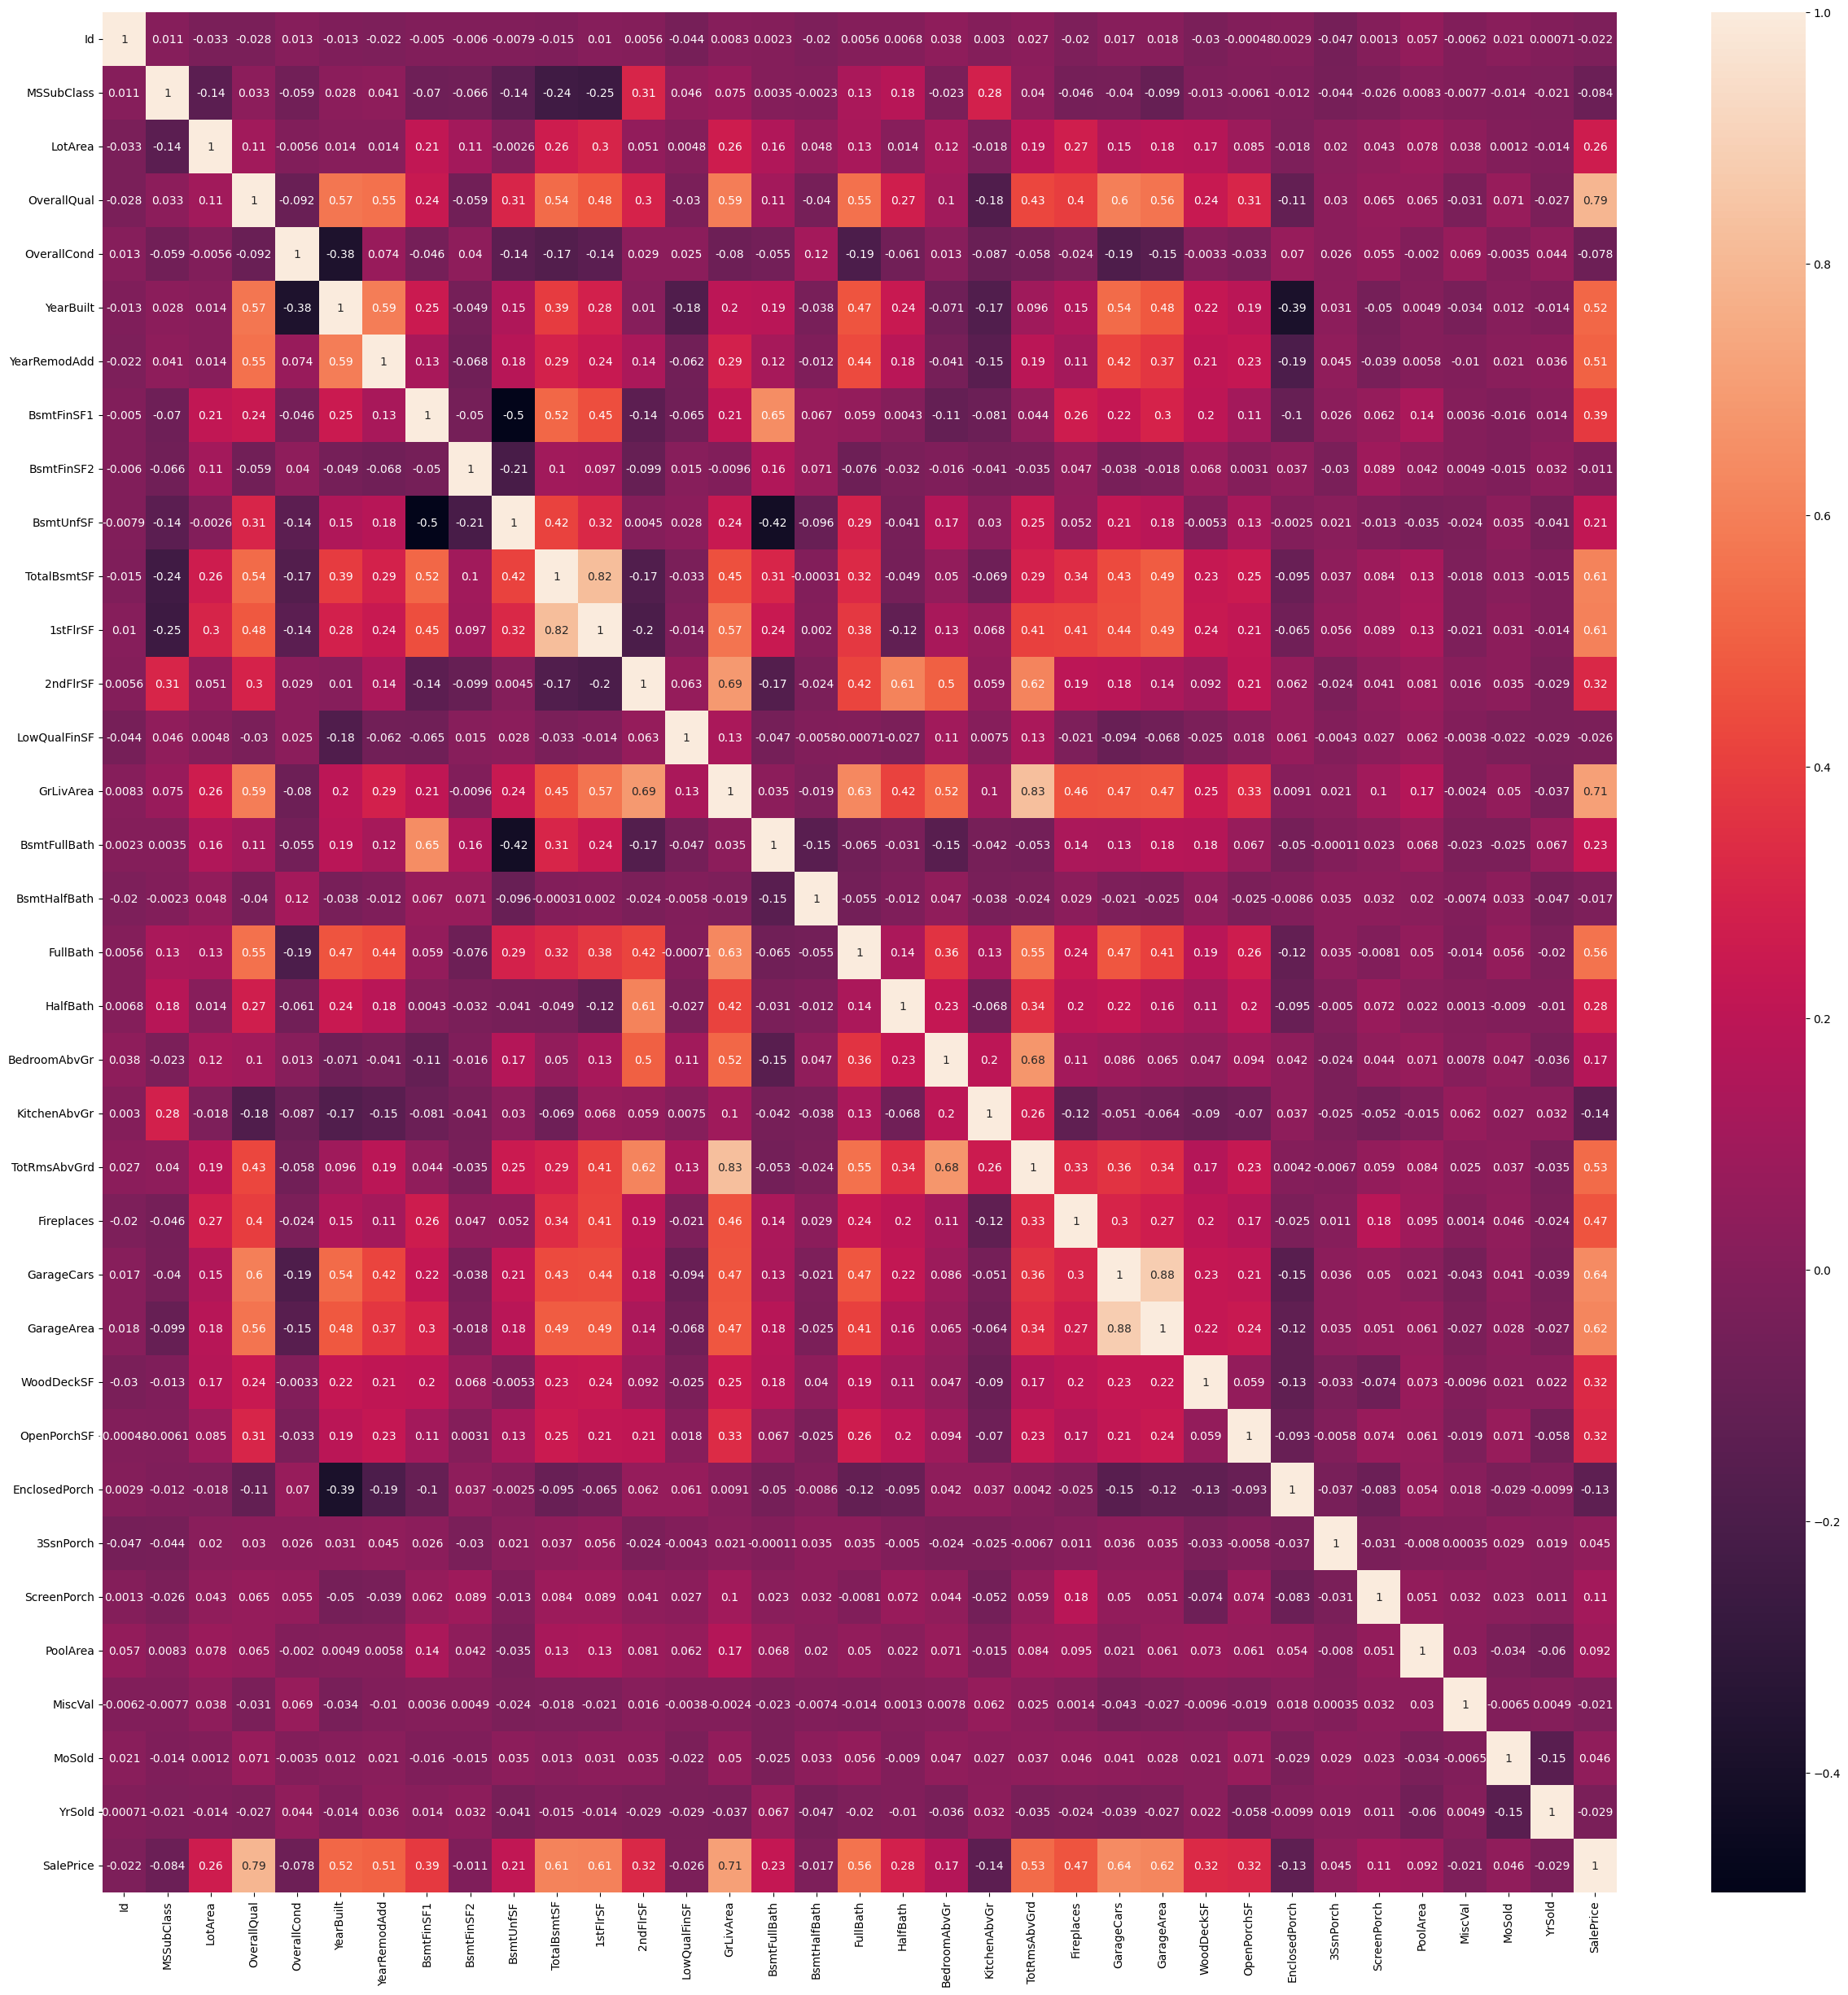

In [ ]:
#include columns of integer type
train_sub = train.select_dtypes(include=['int64'])

#check the correlation
plt.figure(figsize=(30,30))
sns.heatmap(train_sub.corr(), annot=True)

#show the plot
plt.show()

In [ ]:
'''
The dataset visualization looks too overwhelming to look at.
We will subset our data to the relevants features to meet our projects objective. Per the metadata, we have Basement Half Bathrooms (BsmtHalfBath),
Basement Full Bathrooms (BsmtFullBath), FullBath, HalfBath we will find the total number of these features, subset the dataset for our work and then
check the correlation again.
'''

'\nThe dataset visualization looks too overwhelming to look at.\nWe will subset our data to the relevants features to meet our projects objective. Per the metadata, we have Basement Half Bathrooms (BsmtHalfBath),\nBasement Full Bathrooms (BsmtFullBath), FullBath, HalfBath we will find the total number of these features, subset the dataset for our work and then\ncheck the correlation again.\n'

# Feature Engineering & Preprocessing

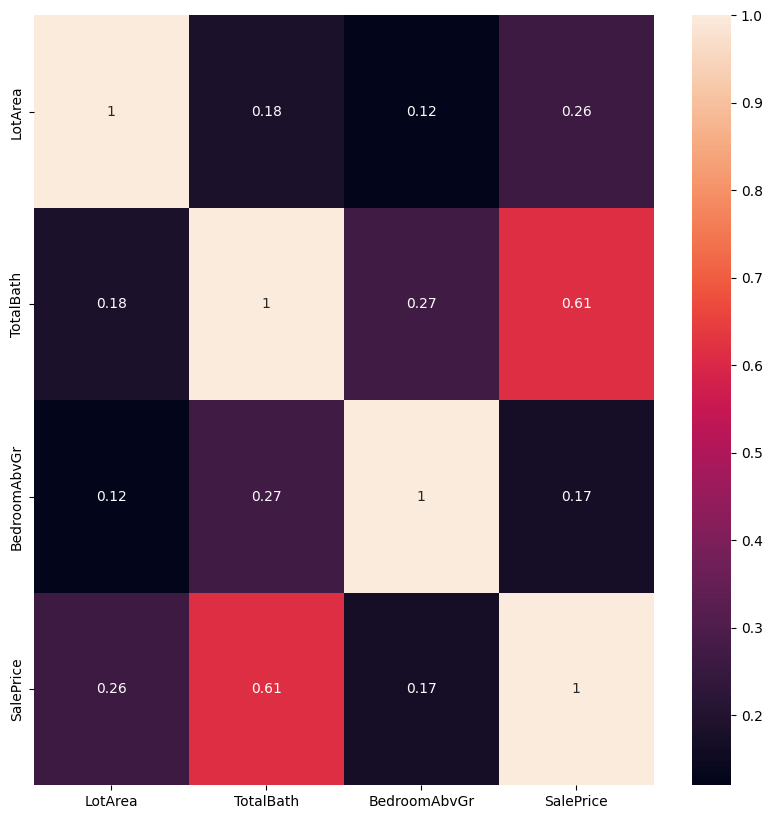

In [ ]:
#sum the bathrooms
train_sub['TotalBath'] = train_sub['BsmtFullBath'] + train_sub['BsmtHalfBath'] + train_sub['FullBath'] + train_sub['HalfBath']

#subset the data
train_final = train_sub[['LotArea','TotalBath','BedroomAbvGr','SalePrice']]

#check the correlation
plt.figure(figsize=(10,10))
sns.heatmap(train_final.corr(), annot=True)

#show the plot
plt.show()

In [ ]:
'''
From the above we see that TotalBath has a good correlation with SalePrice the other two features have a weak correlation but positive
this could also influence our predictions positively.
We will check the relationship and distribution of these features further
'''

'\nFrom the above we see that TotalBath has a good correlation with SalePrice the other two features have a weak correlation but positive\nthis could also influence our predictions positively.\nWe will check the relationship and distribution of these features further\n'

<ipython-input-114-51f52858964a>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_final[column])


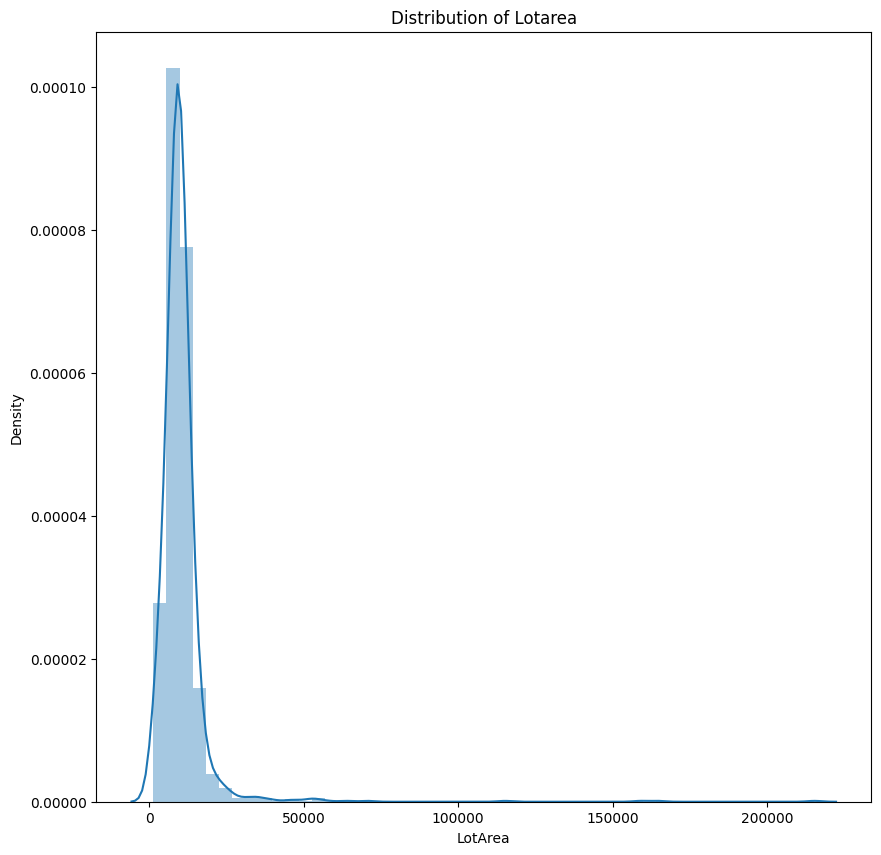

<ipython-input-114-51f52858964a>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_final[column])


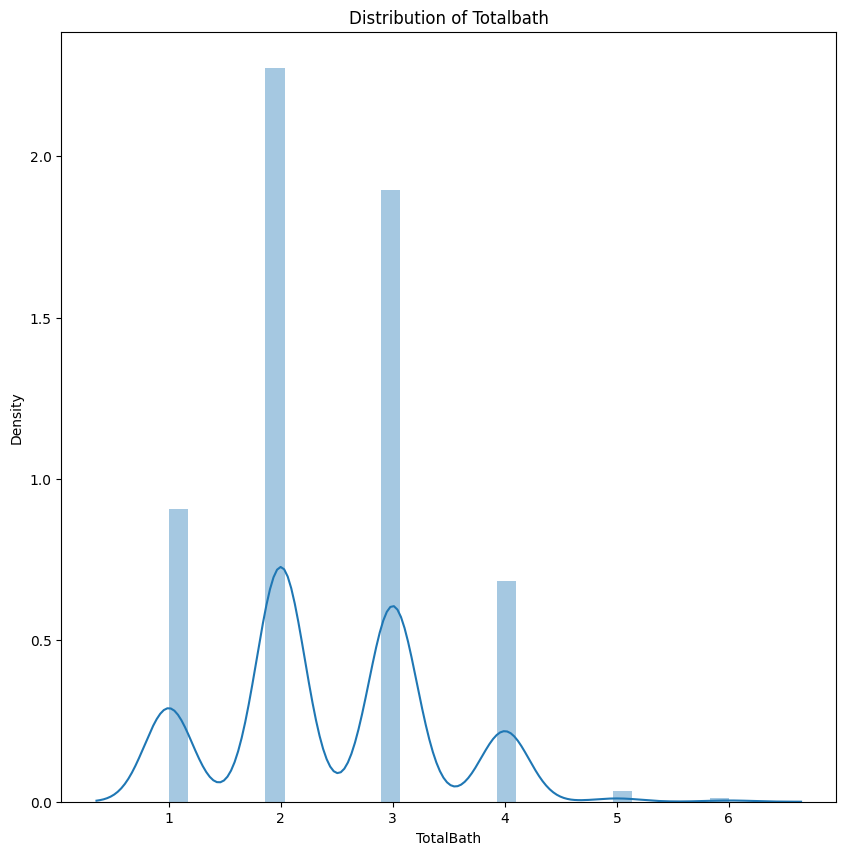

<ipython-input-114-51f52858964a>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_final[column])


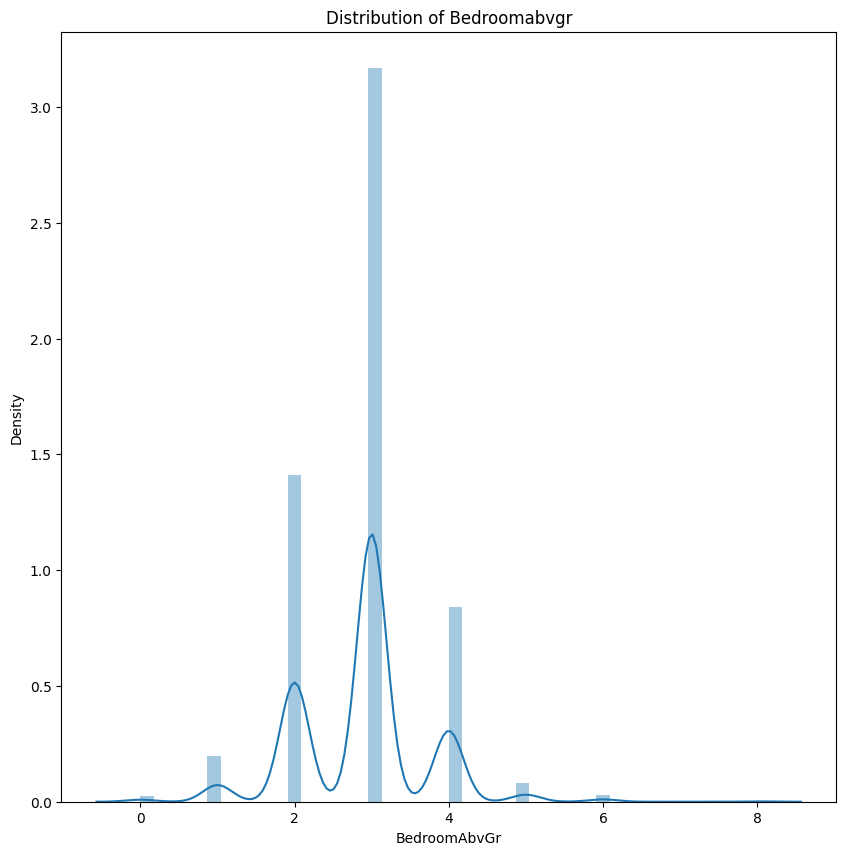

<ipython-input-114-51f52858964a>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_final[column])


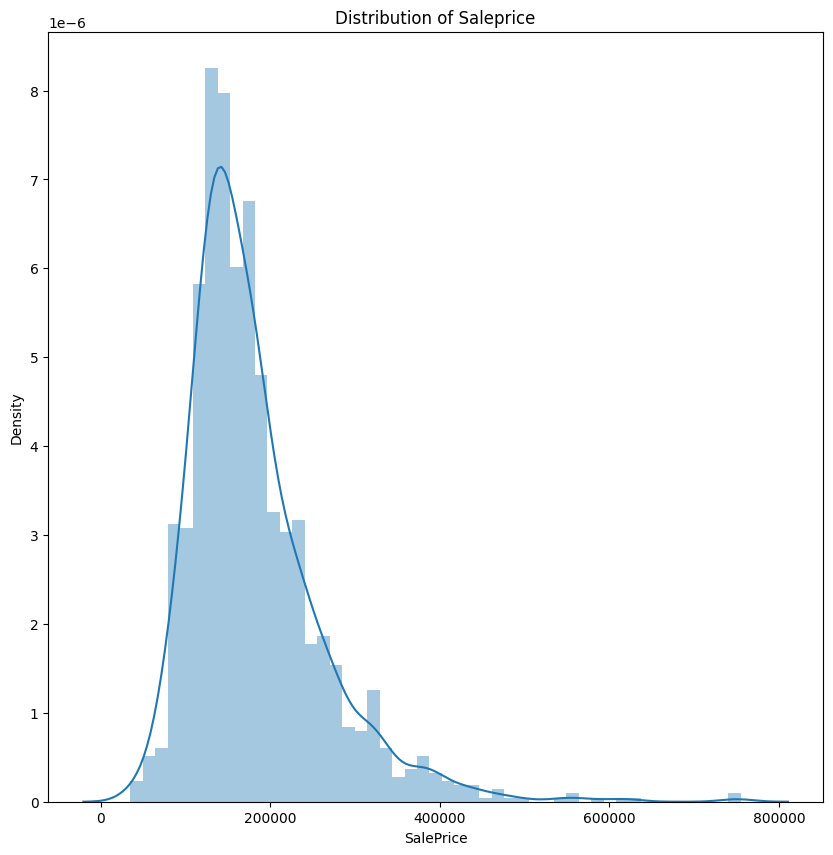

In [ ]:
#check the distribution
for column in train_final.columns:
  plt.figure(figsize=(10,10))

  #plot the distribution
  sns.distplot(train_final[column])

  #set the title
  plt.title(f'Distribution of {column.capitalize()}')

  #show the plot
  plt.show()

In [ ]:
'''
From the plots we see that LotArea and SalePrice are skewed to the right. This indicates the presence of outliers
we will assert this claim with a boxplot and then cap outliers in our data since they could cause our model to predict
wrong results.
'''

'\nFrom the plots we see that LotArea and SalePrice are skewed to the right. This indicates the presence of outliers\nwe will assert this claim with a boxplot and then cap outliers in our data since they could cause our model to predict\nwrong results.\n'

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


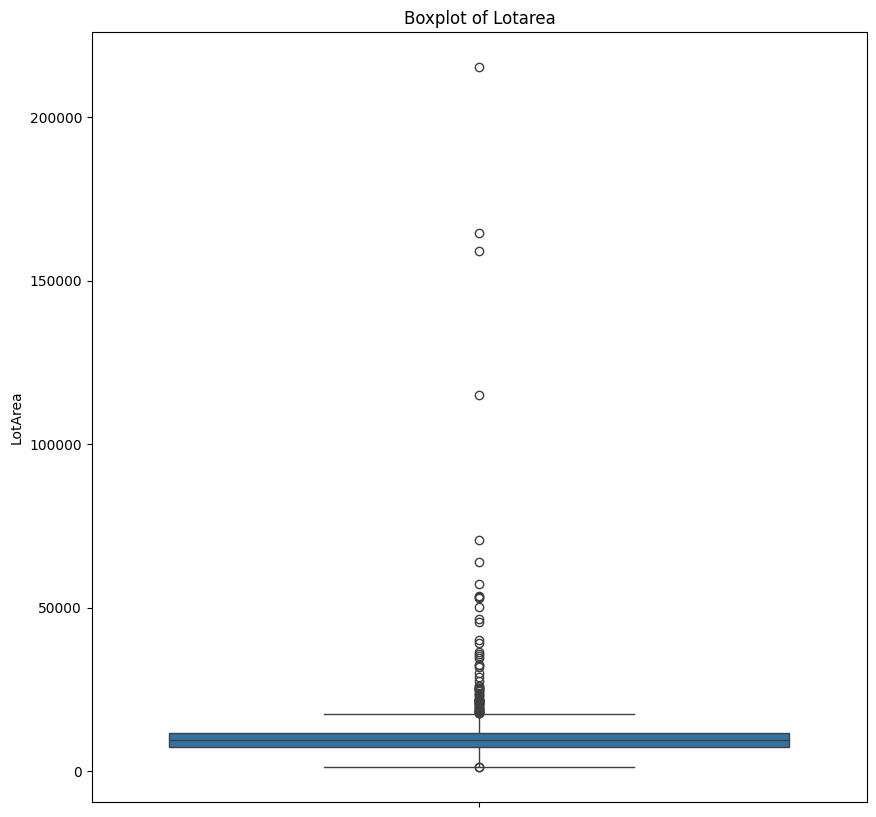

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


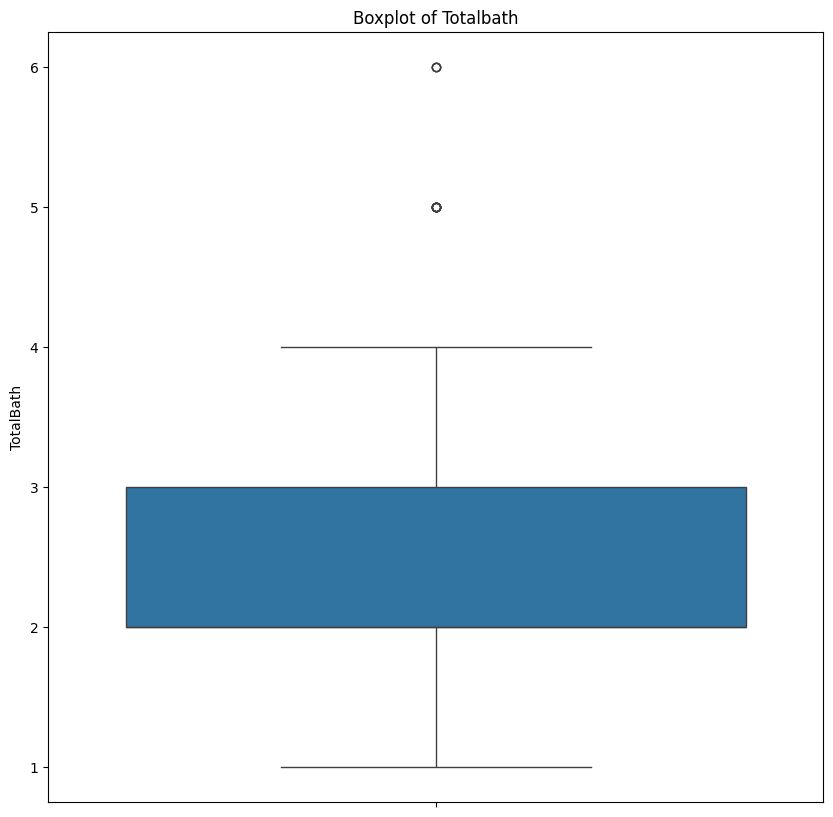

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


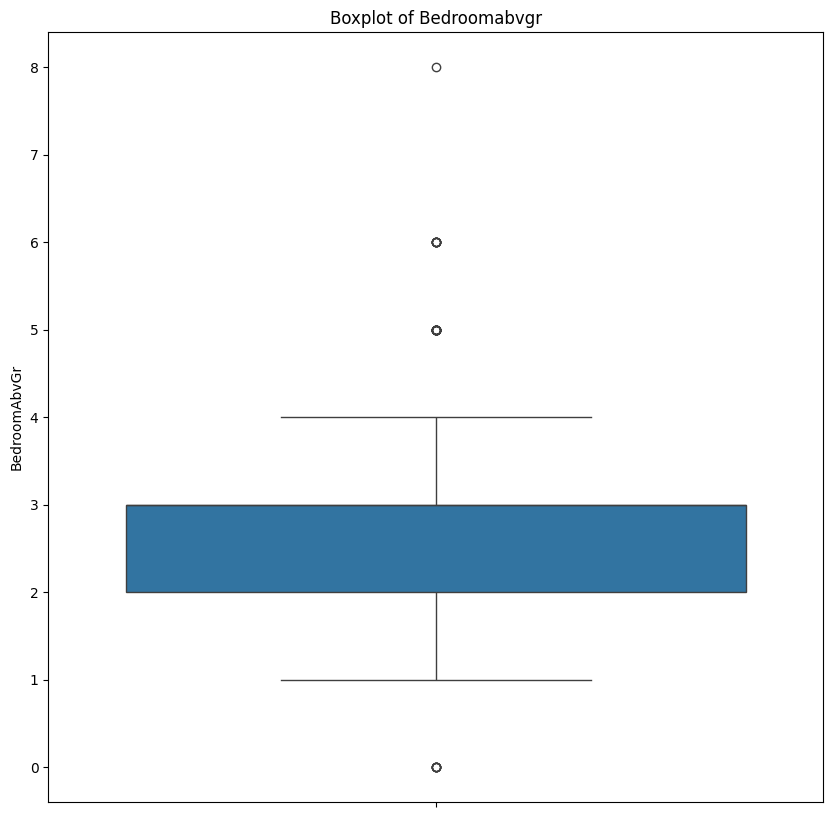

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


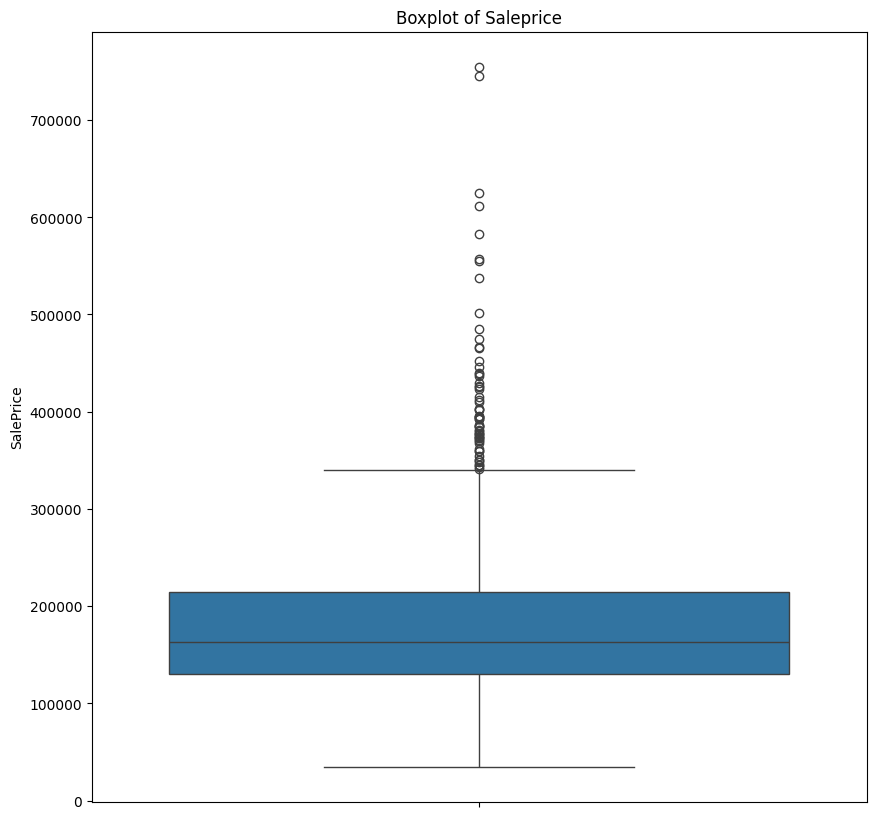

In [ ]:
for column in train_final.columns:
  plt.figure(figsize=(10,10))

  #plot the boxplot
  sns.boxplot(train_final[column])

  #set the title
  plt.title(f'Boxplot of {column.capitalize()}')

  #show the plot
  plt.show()

In [ ]:
'''
We see that we have outliers in all features of our data. We will cap the outliers in data using interquartile range
'''

'\nWe see that we have outliers in all features of our data. We will cap the outliers in data using interquartile range\n'

# Handling Outliers

In [ ]:
# Step 1: Define the IQR for each column
Q1_saleprice = train_final['SalePrice'].quantile(0.25)  # 25th percentile (Q1)
Q3_saleprice = train_final['SalePrice'].quantile(0.75)  # 75th percentile (Q3)
IQR_saleprice = Q3_saleprice - Q1_saleprice  # IQR for SalePrice

Q1_lotarea = train_final['LotArea'].quantile(0.25)  # 25th percentile (Q1)
Q3_lotarea = train_final['LotArea'].quantile(0.75)  # 75th percentile (Q3)
IQR_lotarea = Q3_lotarea - Q1_lotarea  # IQR for LotArea

# Step 2: Define the bounds for outliers
lower_bound_saleprice = Q1_saleprice - 1.5 * IQR_saleprice  # Lower bound for SalePrice
upper_bound_saleprice = Q3_saleprice + 1.5 * IQR_saleprice  # Upper bound for SalePrice

lower_bound_lotarea = Q1_lotarea - 1.5 * IQR_lotarea  # Lower bound for LotArea
upper_bound_lotarea = Q3_lotarea + 1.5 * IQR_lotarea  # Upper bound for LotArea

# Step 3: Remove outliers for both 'SalePrice' and 'LotArea'
# Keep only rows that are within the bounds for both 'SalePrice' and 'LotArea'
train_final_filtered = train_final[
    (train_final['SalePrice'] >= lower_bound_saleprice) & (train_final['SalePrice'] <= upper_bound_saleprice) &
    (train_final['LotArea'] >= lower_bound_lotarea) & (train_final['LotArea'] <= upper_bound_lotarea)
]

# Optional: Check how many rows were removed
print(f"Original data shape: {train_final.shape}")
print(f"Filtered data shape: {train_final_filtered.shape}")

# Now you can use 'train_final_filtered' for further analysis/modeling
train_final_filtered.head()

Original data shape: (1460, 4)
Filtered data shape: (1339, 4)


,LotArea,TotalBath,BedroomAbvGr,SalePrice
0,8450,4,3,208500
1,9600,3,3,181500
2,11250,4,3,223500
3,9550,2,3,140000
4,14260,4,4,250000


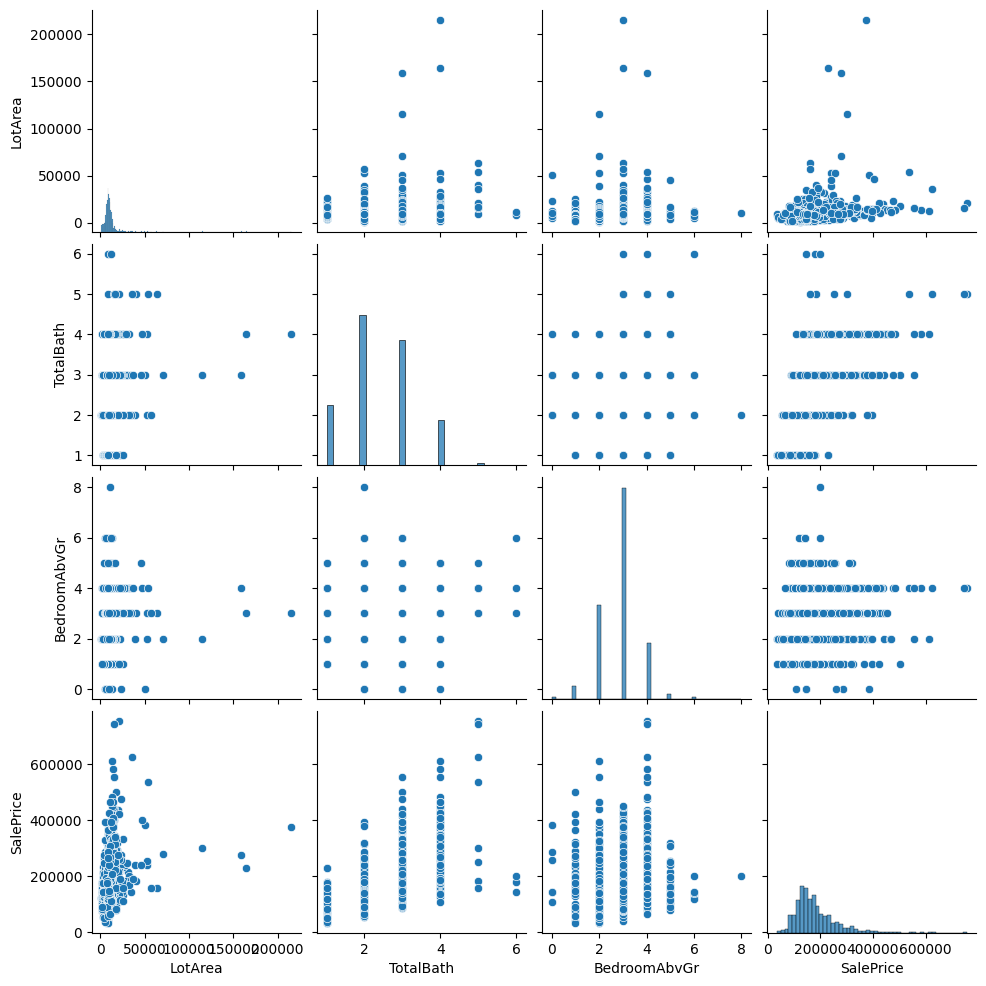

In [ ]:
#check the relationship
sns.pairplot(train_final)

#show the plot
plt.show()

In [ ]:
#check the data
train_final_filtered.describe()

,LotArea,TotalBath,BedroomAbvGr,SalePrice
count,1339.000000,1339.000000,1339.000000,1339.000000
mean,9139.618372,2.361464,2.855863,168946.625840
std,3152.249870,0.889673,0.801336,58972.615378
min,1491.000000,1.000000,0.000000,34900.000000
25%,7313.500000,2.000000,2.000000,128000.000000
50%,9158.000000,2.000000,3.000000,157900.000000
75%,11034.500000,3.000000,3.000000,201000.000000
max,17671.000000,6.000000,8.000000,340000.000000


In [ ]:
'''
  We have handled the outliers that can affect the models ability to generalise on unseen data.
  We will build our model
'''

'\n  We have handled the outliers that can affect the models ability to generalise on unseen data.\n  We will build our model\n'

# Model Training & Evaluation

In [ ]:
#instantiate the model
lin_reg = LinearRegression()

#split the data
X = train_final_filtered[['LotArea','TotalBath','BedroomAbvGr']]
y = train_final_filtered['SalePrice']

#fit the model
lin_reg.fit(X, y)

#evaluate the model
print(f'R2 Score: {r2_score(y, lin_reg.predict(X))}')
print(f'MSE: {mean_squared_error(y, lin_reg.predict(X))}')

R2 Score: 0.4578200589259218
MSE: 1884168591.3926373


In [ ]:
'''
We had a poor performance on our model because the relationship between these features is not so linear
We will try to make the relationship by linear by applying polynomial features
'''

'\nWe had a poor performance on our model because the relationship between these features is not so linear\nWe will try to make the relationship by linear by applying polynomial features\n'

In [ ]:
#apply polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_poly = poly.fit_transform(X)

#fit the model
lin_reg.fit(X_poly, y)

#evaluate the model
print(f'R2 Score: {r2_score(y, lin_reg.predict(X_poly))}')
print(f'RMSE: {np.sqrt(mean_squared_error(y, lin_reg.predict(X_poly)))}')

R2 Score: 0.47353871744641496
RMSE: 42773.16387911823


In [ ]:
#read the test data
test = pd.read_csv('/content/test.csv')

#add the bathroom
test['TotalBath'] = test['BsmtFullBath'] + test['BsmtHalfBath'] + test['FullBath'] + test['HalfBath']

#subset the data
test_final = test[['LotArea','TotalBath','BedroomAbvGr']]

In [ ]:
'''
Model predicts with a fairly good R2 score given the relationship between our features is not so linear.
We will now use the model to predict on the test data
'''

'\nModel predicts with a fairly good R2 score given the relationship between our features is not so linear.\nWe will now use the model to predict on the test data\n'

In [ ]:
#read the test data
test = pd.read_csv('/content/test.csv')

#add the bathrooms
test['TotalBath'] = test['BsmtFullBath'] + test['BsmtHalfBath'] + test['FullBath'] + test['HalfBath']

#subset the data
test_final = test[['LotArea','TotalBath','BedroomAbvGr']]

# Impute missing values in test_final
!pip install sklearn
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median') # Use the same strategy as your training data
test_final = imputer.fit_transform(test_final)

#apply polynomial features - this should be done after imputation to avoid errors
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
test_final = poly.fit_transform(test_final)

#predict the saleprice
predictions = lin_reg.predict(test_final)

#save the data
submission = pd.DataFrame(predictions).to_csv('submission.csv', index=False)

#check the submission
!head submission.csv

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
0
114291.9323657876
182262.57058097085
222946.4040880352
197477.53299405647
138453.0151383324
197622.99383623395
184267.04378175913
187057.24720898108
206238.02903925892


In [ ]:
#end of notebook